# Descriptive statistics

- get overall info about participants
- assess normality of response times (RTs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import os

alpha = 0.05

d = pd.read_csv(os.path.join("..", "data", "serial-data.csv"), index_col=0)
agg = pd.read_csv(os.path.join("..", "data", "aggregated-data.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 23736 lines 258 participants


/Users/davidbrezina/.pyenv/versions/3.9.9/envs/data/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Overall info about participants

In [2]:
TPP = 20  # there are 20 trials in practice
TPM = 72  # there are 72 trials in main part
TPL = 20  # there are 20 trials in a lexical test


print("Number of participants:")
display(pd.DataFrame(d["StudyID"].value_counts() / (TPP + TPM)))

print()
print()
print("Different kinds of designers:")

display(pd.DataFrame(d.groupby("StudyID")["Training"].value_counts() / (TPP + TPM)))

Number of participants:


,StudyID
Main,234.0
Pilot,24.0




Different kinds of designers:


Training
StudyID Training                  
Main    Non-designer         121.0
        Graphic designer      48.0
        Letter designer       37.0
        Other designer        21.0
        Typographer            7.0
Pilot   Non-designer          16.0
        Letter designer        6.0
        Typographer            2.0

# Assess normality of RTs

The distributions of RTs are not normal, but close enough.

Normality test for RT


,W,pval,normal
RT,0.767286,8.699529e-32,False


Normality test for RT (normalized)


,W,pval,normal
RT (normalized),0.995962,0.041201,False


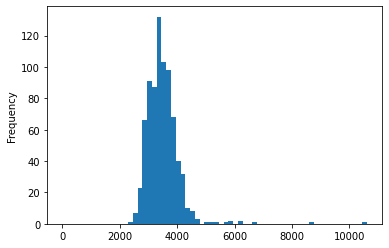

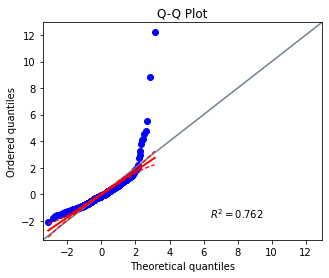

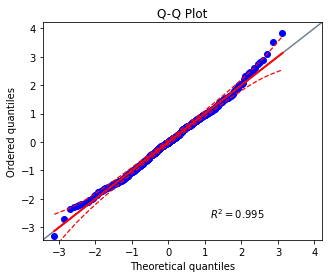

In [3]:
# assess normality of RTs
for col in ["RT", "RT (normalized)"]:
    rts = agg[col]
    rts.plot.hist(bins=50, sharey=True)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for col in ["RT", "RT (normalized)"]:
    print("Normality test for %s" % col)
    display(pg.normality(agg[col]))

# Q-Q plots
for col in ["RT", "RT (normalized)"]:
    pg.qqplot(agg[col], dist="norm")

,ParticipantID,Composite pair,Congruent pair,TestID,TrialID,Training,isDesigner,GreekLatin,Correct,Correct (normalized),ET,RT,RT (normalized),Date,AUC,AUC (normalized),Type,Focus
StudyID,,,,,,,,,,,,,,,,,,
Main,0,False,True,1,24,Letter designer,True,NaN,1.000000,3.141593,266.700000,2924.541667,7.963491,2022-06-28 12:51:46,1.000000,3.141593,Normal,Letters
Main,0,True,False,1,24,Letter designer,True,NaN,0.791667,2.487094,266.700000,3640.583333,8.104807,2022-06-28 12:51:46,0.829861,2.291245,Composite incongruent,Letters
Main,0,True,True,1,24,Letter designer,True,NaN,0.708333,2.225295,266.700000,3097.500000,8.021543,2022-06-28 12:51:46,0.756944,2.110508,Composite congruent,Letters
Main,1,False,True,1,24,Other designer,True,NaN,0.833333,2.617994,344.400000,3060.875000,8.020325,2022-06-27 14:52:05,0.833333,2.300524,Normal,Other design
Main,1,True,False,1,24,Other designer,True,NaN,0.208333,0.654498,344.400000,3081.208333,8.029126,2022-06-27 14:52:05,0.208333,0.947970,Composite incongruent,Other design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pilot,252,True,False,1,22,Non-designer,False,NaN,0.818182,2.570394,543.636364,2850.863636,7.948938,2022-05-23 18:01:23,NaN,NaN,Composite incongruent,None
Pilot,252,True,True,1,2,Non-designer,False,NaN,0.500000,1.570796,543.636364,2985.000000,7.996744,2022-05-23 18:01:23,NaN,NaN,Composite congruent,None
Pilot,253,False,False,1,9,Letter designer,True,NaN,0.777778,2.443461,568.181818,2934.333333,7.978502,2022-05-22 08:00:19,NaN,NaN,Normal,Letters


/var/folders/f2/mncm4dfn70gbl4mshhy77hbr0000gn/T/ipykernel_78337/1945890159.py:30: FutureWarning: ['GreekLatin', 'Date', 'Focus'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Training         Type                                     
Graphic designer Composite congruent    2.132031  0.262630
                 Composite incongruent  2.049878  0.270441
                 Normal                 2.724598  0.306586
Letter designer  Composite congruent    2.290040  0.225931
                 Composite incongruent  2.205565  0.281082
                 Normal                 2.943236  0.263609
Non-designer     Composite congruent    2.053457  0.241155
                 Composite incongruent  1.889341  0.275411
                 Normal                 2.608429  0.341246
Other designer   Composite congruent    2.143599  0.221999
                 Composite incongruent  1.824327  0.444026
                 Normal                 2.722330  0.351530
Typographer      Composite congruent    2.249180  0.238303
                 Composite incongruent  2.251405  0.238263
                 Normal                 2.882868  0.222180

/var/folders/f2/mncm4dfn70gbl4mshhy77hbr0000gn/T/ipykernel_78337/1945890159.py:36: FutureWarning: ['Training', 'GreekLatin', 'Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Focus        Type                                     
Letters      Composite congruent    2.283540  0.225583
             Composite incongruent  2.212857  0.272680
             Normal                 2.933632  0.256055
None         Composite congruent    2.053457  0.241155
             Composite incongruent  1.889341  0.275411
             Normal                 2.608429  0.341246
Other design Composite congruent    2.135551  0.249394
             Composite incongruent  1.981232  0.345642
             Normal                 2.723908  0.318298

<AxesSubplot:title={'center':'AUC (normalized)'}, xlabel='Focus,Type'>

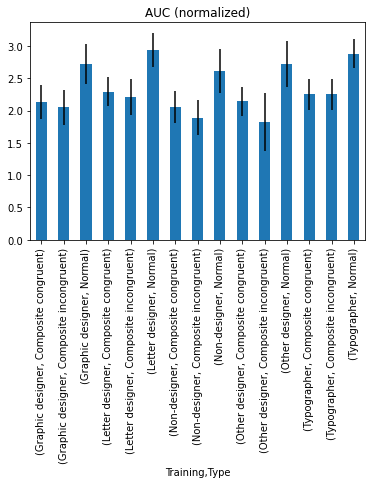

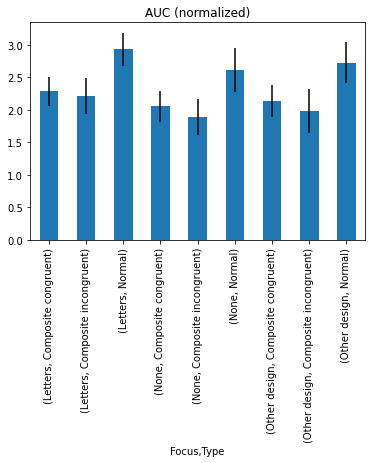

In [4]:
from copy import copy
# from scipy.stats import sem

agg["Type"] = "Normal"
conditions = [
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(True),
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(False),
]
choices = [
  "Composite congruent",
  "Composite incongruent"
]
agg["Type"] = np.select(conditions, choices, default="Normal")
conditions = [
  agg["Training"].eq("Other designer"),
  agg["Training"].eq("Graphic designer"),
  agg["Training"].eq("Typographer"),
  agg["Training"].eq("Letter designer"),
]
choices = [
  "Other design",
  "Other design",
  "Letters",
  "Letters",
]
agg["Focus"] = np.select(conditions, choices, default="None")

display(agg)

auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")

auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")
